In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def generate_synthetic_data():
    print("Generating synthetic energy data...")
    # Create date range for 6 months: Jan 2023 to June 2023
    date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')
    
    # Create DataFrame
    df = pd.DataFrame(date_rng, columns=['timestamp'])
    
    # Simulate device power consumption (Watts)
    
    # 1. Fridge: Cyclic pattern (Compressor On/Off) + Base load
    # Randomly switching between low (idle) and high (cooling) states
    df['fridge'] = np.random.randint(50, 200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.3, 0.7])
    
    # 2. AC: Higher in summer (April-June), lower in winter (Jan-March)
    month = df['timestamp'].dt.month
    # Higher probability of AC being ON in months 4, 5, 6
    ac_prob = np.where(month >= 4, 0.8, 0.1) 
    df['ac'] = np.random.randint(1000, 2500, size=(len(date_rng))) * np.random.binomial(1, ac_prob)
    
    # 3. Lights: Higher usage at night (18:00 - 06:00)
    hour = df['timestamp'].dt.hour
    light_prob = np.where((hour >= 18) | (hour <= 6), 0.9, 0.1)
    df['lights'] = np.random.randint(20, 100, size=(len(date_rng))) * np.random.binomial(1, light_prob)
    
    # 4. Microwave: Random usage spikes
    df['microwave'] = np.random.randint(800, 1200, size=(len(date_rng))) * np.random.choice([0, 1], size=len(date_rng), p=[0.95, 0.05])
    
    # Total power consumption
    df['total_power'] = df['fridge'] + df['ac'] + df['lights'] + df['microwave']
    
    # Introduce some random missing values to practice cleaning
    # Set 0.5% of total_power to NaN
    mask = np.random.choice([True, False], size=len(df), p=[0.005, 0.995])
    df.loc[mask, 'total_power'] = np.nan
    
    return df

# Generate and save
df_raw = generate_synthetic_data()
print("Data Generated. Shape:", df_raw.shape)
df_raw.to_csv()


Generating synthetic energy data...
Data Generated. Shape: (4321, 6)


C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_26420\2771334033.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='1/1/2023', end='6/30/2023', freq='H')


',timestamp,fridge,ac,lights,microwave,total_power\r\n0,2023-01-01 00:00:00,172,0,51,0,223.0\r\n1,2023-01-01 01:00:00,64,0,65,0,129.0\r\n2,2023-01-01 02:00:00,161,0,83,0,244.0\r\n3,2023-01-01 03:00:00,0,0,56,0,56.0\r\n4,2023-01-01 04:00:00,141,2087,50,0,2278.0\r\n5,2023-01-01 05:00:00,139,1926,23,0,2088.0\r\n6,2023-01-01 06:00:00,0,0,81,0,81.0\r\n7,2023-01-01 07:00:00,0,0,0,0,0.0\r\n8,2023-01-01 08:00:00,105,0,0,0,105.0\r\n9,2023-01-01 09:00:00,0,0,0,0,0.0\r\n10,2023-01-01 10:00:00,0,0,0,0,0.0\r\n11,2023-01-01 11:00:00,0,0,0,0,0.0\r\n12,2023-01-01 12:00:00,0,0,0,0,\r\n13,2023-01-01 13:00:00,163,0,0,0,163.0\r\n14,2023-01-01 14:00:00,167,0,0,1169,1336.0\r\n15,2023-01-01 15:00:00,0,0,0,0,0.0\r\n16,2023-01-01 16:00:00,172,0,0,0,172.0\r\n17,2023-01-01 17:00:00,166,0,0,0,166.0\r\n18,2023-01-01 18:00:00,155,0,98,0,253.0\r\n19,2023-01-01 19:00:00,61,1219,99,0,1379.0\r\n20,2023-01-01 20:00:00,0,0,0,0,0.0\r\n21,2023-01-01 21:00:00,101,1508,50,0,1659.0\r\n22,2023-01-01 22:00:00,198,1233,43,0,1474

In [13]:
df_raw.to_csv("Synthetic-Data",index=True)
df_raw.iloc[:30]
df_raw


,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,172,0,51,0,223.0
1,2023-01-01 01:00:00,64,0,65,0,129.0
2,2023-01-01 02:00:00,161,0,83,0,244.0
3,2023-01-01 03:00:00,0,0,56,0,56.0
4,2023-01-01 04:00:00,141,2087,50,0,2278.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,70,1243,78,0,1391.0
4317,2023-06-29 21:00:00,0,2280,82,0,2362.0
4318,2023-06-29 22:00:00,138,1148,41,0,1327.0
4319,2023-06-29 23:00:00,0,1483,99,0,1582.0


In [14]:
missing = df_raw.isnull().sum()
print("Missing Values per column:\n", missing)

Missing Values per column:
 timestamp       0
fridge          0
ac              0
lights          0
microwave       0
total_power    23
dtype: int64


In [4]:
df_raw[df_raw['total_power'].isna()].index

Index([ 113,  183,  438,  455,  675,  772,  827,  863, 1051, 1576, 1933, 2093,
       2473, 2513, 2517, 2879, 3163, 3213, 3366, 3485, 3576, 3780, 3880, 4200,
       4297],
      dtype='int64')

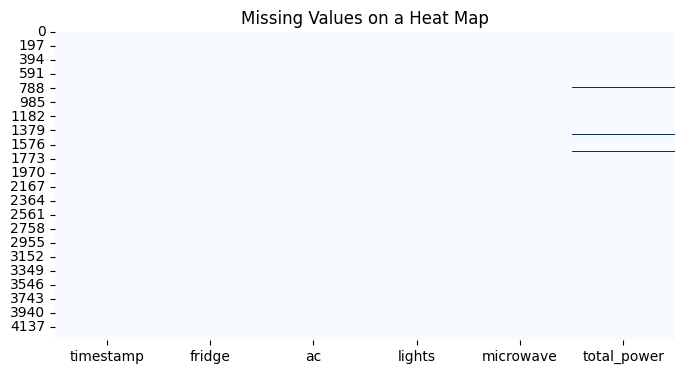

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(df_raw.isnull(),cbar=False,cmap='Blues')
plt.title("Missing Values on a Heat Map")
plt.show()

In [6]:
df_clean = df_raw.fillna(method='bfill')
df_clean.to_csv("Clean-Data",index = False)

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_26420\1635570112.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_clean = df_raw.fillna(method='bfill')


In [7]:
df_clean[df_clean['total_power'].isna()].index

Index([], dtype='int64')

In [8]:
df_daily = df_clean.resample('D').mean()

df_weekly_sum = df_clean.resample('W').sum()

print("Daily resampled Shape", df_daily.shape)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [16]:
df = pd.read_csv('Clean-Data')
df

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,78,0,85,0,163.0
1,2023-01-01 01:00:00,81,0,30,0,111.0
2,2023-01-01 02:00:00,68,0,76,0,144.0
3,2023-01-01 03:00:00,57,1612,69,919,2657.0
4,2023-01-01 04:00:00,150,0,85,0,235.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,194,1193,95,0,1482.0
4317,2023-06-29 21:00:00,0,1715,46,0,1761.0
4318,2023-06-29 22:00:00,92,0,50,0,142.0
4319,2023-06-29 23:00:00,0,1426,27,0,1453.0


In [17]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp']

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
4316   2023-06-29 20:00:00
4317   2023-06-29 21:00:00
4318   2023-06-29 22:00:00
4319   2023-06-29 23:00:00
4320   2023-06-30 00:00:00
Name: timestamp, Length: 4321, dtype: datetime64[ns]

In [18]:
df.set_index('timestamp',inplace=True)

In [19]:
df_daily = df.resample('D').mean()

df_weekly_sum = df.resample('W').sum()

# print("Daily resampled Shape", df_daily)
df_daily.to_csv('timed-data',index=True)
df_daily.head()



,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,93.625000,67.166667,30.583333,86.666667,278.041667
2023-01-02,77.458333,160.666667,25.125000,0.000000,263.250000
2023-01-03,102.000000,217.708333,25.666667,0.000000,345.375000
2023-01-04,83.833333,369.416667,31.375000,76.458333,561.083333
2023-01-05,110.250000,296.208333,24.125000,49.791667,485.208333


In [20]:
df_weekly_sum = df.resample('W').sum()

df_weekly_sum

,fridge,ac,lights,microwave,total_power
timestamp,,,,,
2023-01-01,2247,1612,734,2080,6673.0
2023-01-08,15992,44891,4974,10846,76762.0
2023-01-15,15246,32823,5273,6174,59516.0
2023-01-22,16262,32057,5218,9421,63228.0
2023-01-29,15262,30595,4916,9397,61881.0
2023-02-05,14238,26880,5389,7319,55243.0
2023-02-12,15733,32240,5193,9635,62801.0
2023-02-19,15035,34778,5210,4487,59540.0
2023-02-26,15830,25476,5317,11914,58537.0


In [29]:
df
df_clean

,timestamp,fridge,ac,lights,microwave,total_power
0,2023-01-01 00:00:00,78,0,85,0,163.0
1,2023-01-01 01:00:00,81,0,30,0,111.0
2,2023-01-01 02:00:00,68,0,76,0,144.0
3,2023-01-01 03:00:00,57,1612,69,919,2657.0
4,2023-01-01 04:00:00,150,0,85,0,235.0
...,...,...,...,...,...,...
4316,2023-06-29 20:00:00,194,1193,95,0,1482.0
4317,2023-06-29 21:00:00,0,1715,46,0,1761.0
4318,2023-06-29 22:00:00,92,0,50,0,142.0
4319,2023-06-29 23:00:00,0,1426,27,0,1453.0


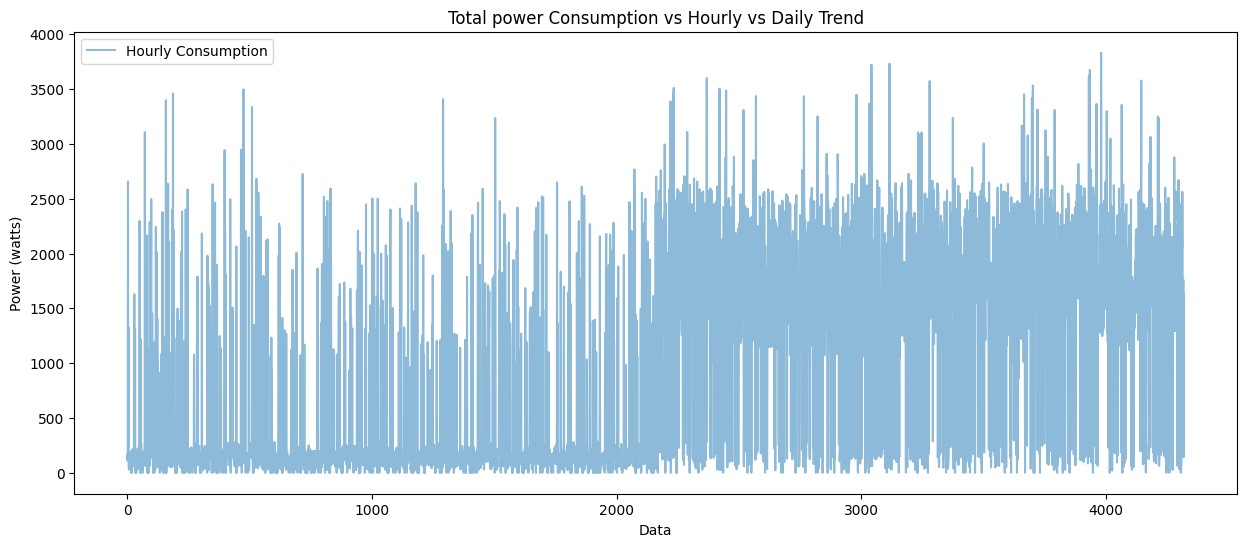

In [21]:
plt.figure(figsize=(15,6))
plt.plot(df_clean.index,df_clean['total_power'],label="Hourly Consumption", alpha = 0.5)
# plt.plot(df_clean.index,df_clean['total_power'],label="Daily Moving Average",color="red", alpha = 0.5)
plt.title("Total power Consumption vs Hourly vs Daily Trend")
plt.xlabel("Data")
plt.ylabel("Power (watts)")
plt.legend()
plt.show()

In [22]:
avg_consumption = df_clean[['fridge','ac','lights','microwave']].mean()
avg_consumption



fridge        89.282111
ac           799.058320
lights        31.314973
microwave     49.477436
dtype: float64

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_26420\145540252.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


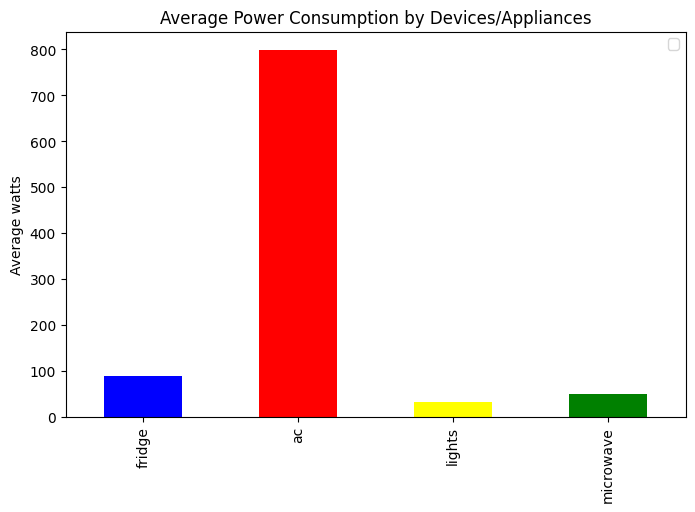

In [23]:
plt.figure(figsize = (8,5))
avg_consumption.plot(kind="bar",color = ['blue','red','yellow','green'])
plt.title("Average Power Consumption by Devices/Appliances")
plt.ylabel("Average watts")
plt.legend()
plt.show()

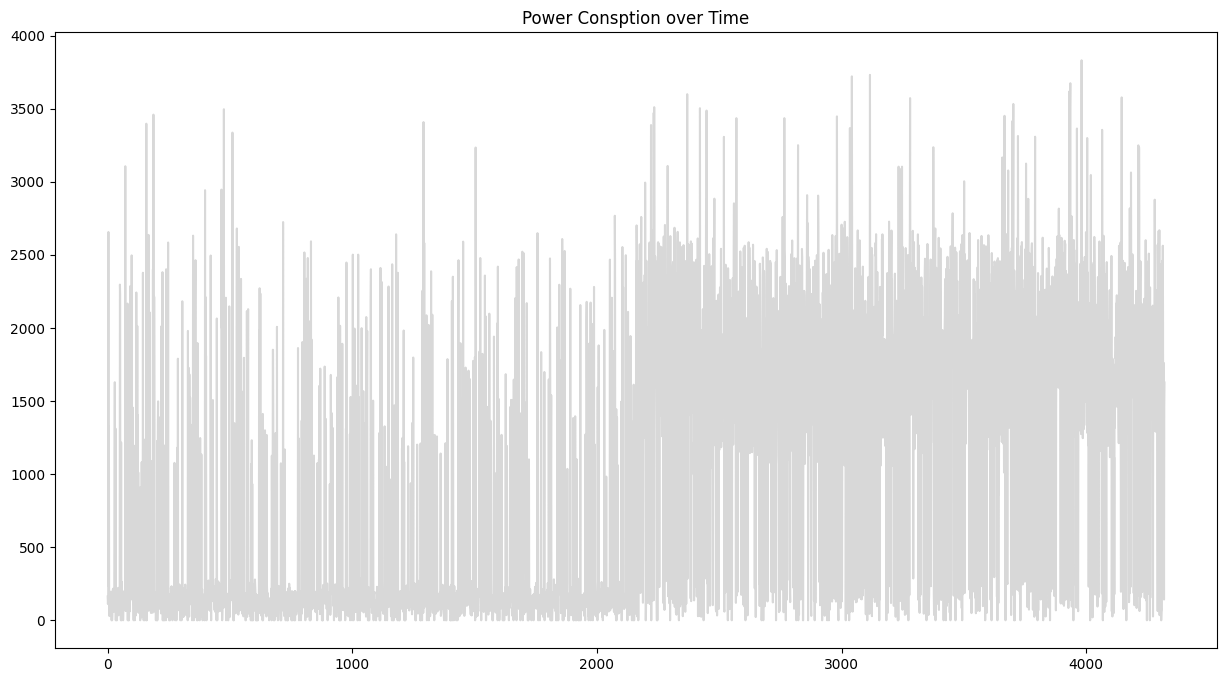

In [30]:
plt.figure(figsize=(15,8))
plt.plot(df_clean.index, df_clean['total_power'],alpha=0.3,color = "gray", label = "Power Consumption Hourly") 
plt.title("Power Consption over Time")
plt.show()

In [31]:
df_clean.columns

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [32]:
df = pd.read_csv('HomeC.csv')
df

C:\Users\SRIDHAR RAO\AppData\Local\Temp\ipykernel_26420\1728068120.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('HomeC.csv')


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.00,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503906,1452128306,1.599333,0.003233,1.599333,0.000050,0.104017,0.625033,0.041750,0.005233,0.008433,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503907,1452128307,1.924267,0.003217,1.924267,0.000033,0.422383,0.637733,0.042033,0.004983,0.008467,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503908,1452128308,1.978200,0.003217,1.978200,0.000050,0.495667,0.620367,0.042100,0.005333,0.008233,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51
503909,1452128309,1.990950,0.003233,1.990950,0.000050,0.494700,0.634133,0.042100,0.004917,0.008133,...,8.74,Light Rain,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51


In [26]:
df.columns = [col.replace('[kW]', '').strip() for col in df.columns]
print("CLeaned Column Names: ", df.columns.tolist())
df.columns


CLeaned Column Names:  ['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave', 'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability']


Index(['time', 'use', 'gen', 'House overall', 'Dishwasher', 'Furnace 1',
       'Furnace 2', 'Home office', 'Fridge', 'Wine cellar', 'Garage door',
       'Kitchen 12', 'Kitchen 14', 'Kitchen 38', 'Barn', 'Well', 'Microwave',
       'Living room', 'Solar', 'temperature', 'icon', 'humidity', 'visibility',
       'summary', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability'],
      dtype='object')

In [28]:
kitchen_cols = ['Dishwasher','Microwave','Fridge','Kitchen 12 [kW]','Kitchen 14 [kW]','Kitchen 38 [kW]']
available_cols = [c for c in kitchen_cols if c in df.columns]
df_kitchen = df[available_cols]
df_kitchen.sum()
df_kitchen
df_kitchen.notnull()






,Dishwasher,Microwave,Fridge
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
503906,True,True,True
503907,True,True,True
503908,True,True,True
503909,True,True,True


In [33]:
df['Total_Kitchen_Power'] = df[available_cols].sum(axis=1)

df['High_Useage'] = df['Total_Kitchen_Power'] <1.0
df[['Total_Kitchen_Power','High_Useage']].sample(50)

KeyError: "None of [Index(['Dishwasher', 'Microwave', 'Fridge'], dtype='object')] are in the [columns]"

In [ ]:
df['time'] = pd.to_datetime(df['time'])
df['time']
df['timestamp']
df.columns
df['time']
df['hour'] = df['timestamp'].dt.hour

In [ ]:
df['hour'] = df.index.M

hourly_status = df.groupby('Hour')['use'].mean()

plt.figure(figsize = (10,5))
hourly_status.plot(kind = 'bar', color='orange')
plt.show()

In [38]:
df.columns

Index(['time', 'use [kW]', 'gen [kW]', 'House overall [kW]', 'Dishwasher [kW]',
       'Furnace 1 [kW]', 'Furnace 2 [kW]', 'Home office [kW]', 'Fridge [kW]',
       'Wine cellar [kW]', 'Garage door [kW]', 'Kitchen 12 [kW]',
       'Kitchen 14 [kW]', 'Kitchen 38 [kW]', 'Barn [kW]', 'Well [kW]',
       'Microwave [kW]', 'Living room [kW]', 'Solar [kW]', 'temperature',
       'icon', 'humidity', 'visibility', 'summary', 'apparentTemperature',
       'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity',
       'dewPoint', 'precipProbability'],
      dtype='object')

In [39]:
df_clean.columns

Index(['timestamp', 'fridge', 'ac', 'lights', 'microwave', 'total_power'], dtype='object')

In [ ]:
pip install statsmodels

In [54]:
df_clean['total_power']

0        163.0
1        111.0
2        144.0
3       2657.0
4        235.0
         ...  
4316    1482.0
4317    1761.0
4318     142.0
4319    1453.0
4320    1627.0
Name: total_power, Length: 4321, dtype: float64

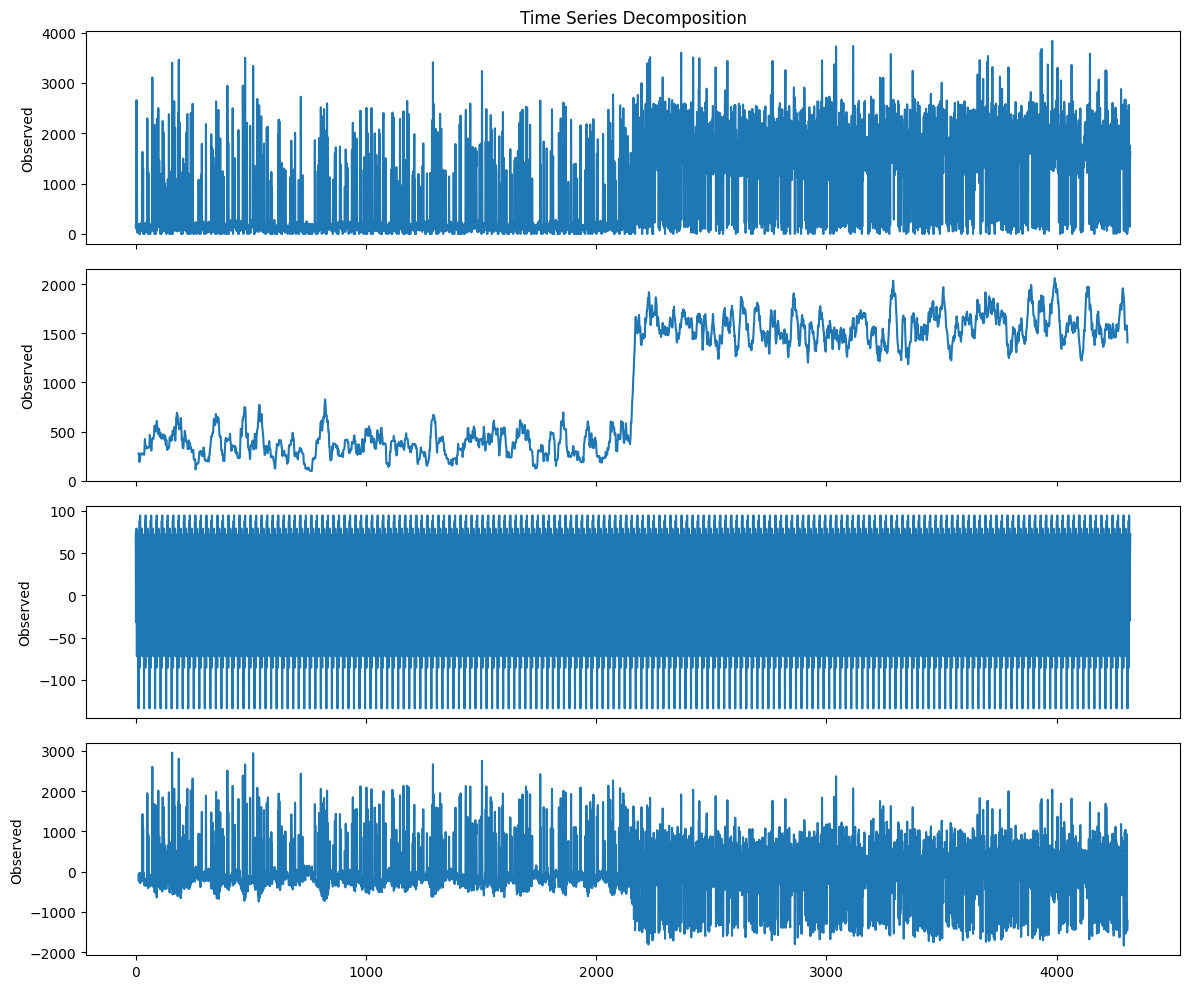

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose

target_col = df_clean['total_power']

# Y(t) = Trend(t) + Seasonality(t) + Residual(t)
decomposition = seasonal_decompose(df_clean['total_power'], model = 'additive', period = 24)

decomposition

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10),sharex=True)

decomposition.observed.plot(ax=ax1)
ax1.set_ylabel("Observed")
ax1.set_title("Time Series Decomposition")

decomposition.trend.plot(ax=ax2)
ax2.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

decomposition.resid.plot(ax=ax4)
ax4.set_ylabel("Observed")
# ax1.set_title("Time Series Decomposition")

plt.tight_layout()
plt.show()
